In [1]:
# Librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split

import seaborn as sns

In [2]:
# Cargando el archivo y agregando el nombre a cada columna
df = pd.DataFrame(np.load("proyecto_training_data.npy")\
                  ,columns = ['sale_price','overallquial','stfloor_square','room','year_built','lot_frontage'])

In [3]:
# Verificando el tipo de cada columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sale_price      1460 non-null   float64
 1   overallquial    1460 non-null   float64
 2   stfloor_square  1460 non-null   float64
 3   room            1460 non-null   float64
 4   year_built      1460 non-null   float64
 5   lot_frontage    1201 non-null   float64
dtypes: float64(6)
memory usage: 68.6 KB


In [4]:
# explorando los datos que LotFrontage: Linear feet of street connected to property tienen datos vacíos
# se procedio a colocar la media aritmetica
df['lot_frontage'] = df['lot_frontage'].fillna( df['lot_frontage'].mean() )
df['lot_frontage'] = df['lot_frontage'].astype(int)
df['year_built'] = df['year_built'].astype(int)
df["valor1"] = 1
                                               

### **Separando los datos 80% entrenamiento y 20% prueba**

In [5]:
X = df.iloc[:,1:].values # seleccionando las variables independientes
y = df.iloc[:,:1].values # seleccionando la variable dependiente


In [6]:
# Obteniendo el 80% para el entrenamiento y el 20% prueba
X_entrenamiento, x_prueba, y_entrenamiento, y_prueba = train_test_split(X,y, test_size= 0.2 , random_state = 0 )

In [7]:
# obteniendo la media, desviación estandar, valor minimo y máximo, el primer, segundo y tercer cuartil
df_entrenamiento = (pd.DataFrame(X_entrenamiento)).rename(columns= {0:'overallquial',1:'stfloor_square',2:'room',3:'year_built',4:'lot_frontage' })
print(df_entrenamiento.describe())

       overallquial  stfloor_square         room   year_built  lot_frontage  \
count   1168.000000     1168.000000  1168.000000  1168.000000   1168.000000   
mean       6.086473     1160.958904     6.544521  1970.890411     69.684075   
std        1.367472      373.315037     1.624493    30.407486     20.758010   
min        1.000000      334.000000     2.000000  1872.000000     21.000000   
25%        5.000000      884.000000     5.000000  1953.750000     60.000000   
50%        6.000000     1092.000000     6.000000  1972.000000     70.000000   
75%        7.000000     1389.250000     7.000000  2000.000000     79.000000   
max       10.000000     3228.000000    14.000000  2010.000000    313.000000   

            5  
count  1168.0  
mean      1.0  
std       0.0  
min       1.0  
25%       1.0  
50%       1.0  
75%       1.0  
max       1.0  


In [8]:
# Rango
print(df_entrenamiento.max(axis= 0) - df_entrenamiento.min(axis= 0))

overallquial         9.0
stfloor_square    2894.0
room                12.0
year_built         138.0
lot_frontage       292.0
5                    0.0
dtype: float64


##### Histogramas
> Observando cada una de las variables en estudio, en donde se concentran los datos, es decir 
> la normalidad de cada variable

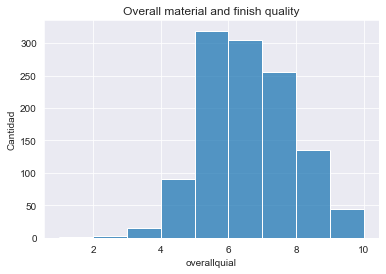

In [9]:
sns.set_style("darkgrid")
hist1 = sns.histplot(data= df_entrenamiento , x="overallquial",binwidth = 1)
hist1.set_title("Overall material and finish quality")
hist1.set(ylabel="Cantidad")
plt.show()

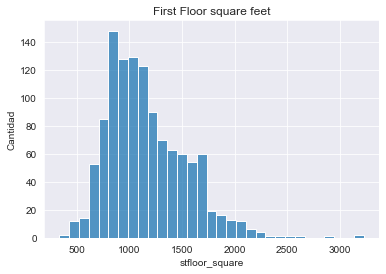

In [10]:
sns.set_style("darkgrid")
hist2 = sns.histplot(data= df_entrenamiento , x="stfloor_square")
hist2.set_title("First Floor square feet")
hist2.set(ylabel="Cantidad")
plt.show()

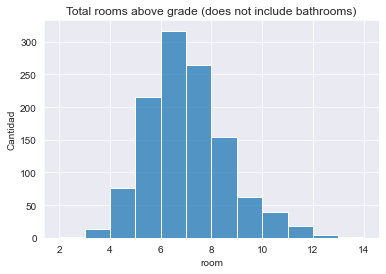

In [11]:
sns.set_style("darkgrid")
hist3 = sns.histplot(data= df_entrenamiento , x="room", binwidth= 1)
hist3.set_title("Total rooms above grade (does not include bathrooms)")
hist3.set(ylabel="Cantidad")
plt.show()

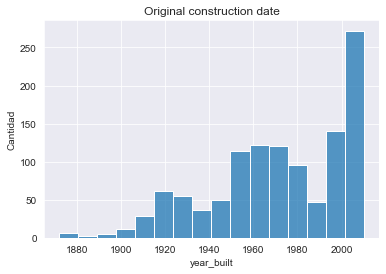

In [12]:
sns.set_style("darkgrid")
hist3 = sns.histplot(data= df_entrenamiento , x="year_built")
hist3.set_title("Original construction date")
hist3.set(ylabel="Cantidad")
plt.show()


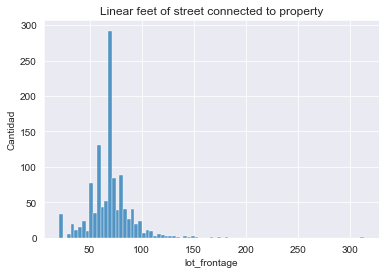

In [13]:
sns.set_style("darkgrid")
hist3 = sns.histplot(data= df_entrenamiento , x="lot_frontage")
hist3.set_title("Linear feet of street connected to property")
hist3.set(ylabel="Cantidad")
plt.show()


##### funcion para los coeficiente de correlación de cada una de las variables

In [14]:

def coeficiente_correlacion(matriz_y, matriz_x):
    """ Función que genera el coeficiente de correlación entre las variables en estudio """
    lista = ['overallquial','stfloor_square','room','year_built','lot_frontage']
    coeficiente = []
    for i in range(0,len(matriz_x[0])-1):
        coef = np.corrcoef(matriz_y[:,0],matriz_x[:,i])
        a = ("Correlación entre sales_price y "+ str(lista[i])+" "+ str(round ((coef[0][1]),3) ))
        coeficiente.append(str(a))
    return coeficiente

In [15]:
# Coeficiente de correlación
coeficiente_correlacion(y_entrenamiento,X_entrenamiento)

['Correlación entre sales_price y overallquial 0.791',
 'Correlación entre sales_price y stfloor_square 0.621',
 'Correlación entre sales_price y room 0.543',
 'Correlación entre sales_price y year_built 0.521',
 'Correlación entre sales_price y lot_frontage 0.341']

##### Función para las gráficas de dispersión
> La gráfica de dispersión permite detectar patrones o relaciones entre las dos variables. Si los puntos están muy dispersos, esto sugiere que no hay una relación fuerte entre las dos variables. Si los puntos están dispuestos en una línea o en una forma no lineal, esto sugiere que hay una relación entre las dos variables.

In [16]:
def scatter(variable_x, coeficiente=0):
    """ Función que realiza el gráfico de dispersión  """
    plt.scatter(x = df_entrenamiento[[variable_x]], y= pd.DataFrame(y_entrenamiento),color = 'red')
    plt.title("sales price and"+" "+variable_x+" / "+ "coef. correlación ="+coeficiente_correlacion(y_entrenamiento,X_entrenamiento)[coeficiente][-5:]   )
    plt.xlabel(variable_x)
    plt.ylabel("Sales price")
    return plt.show()

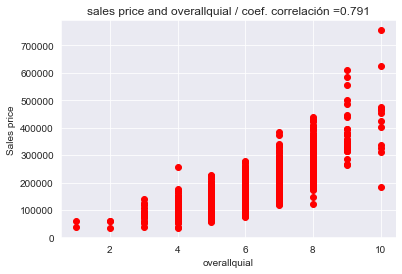

In [17]:
scatter('overallquial') 

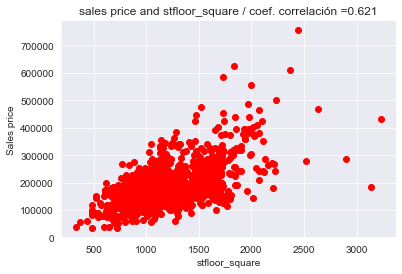

In [18]:
scatter('stfloor_square',1)

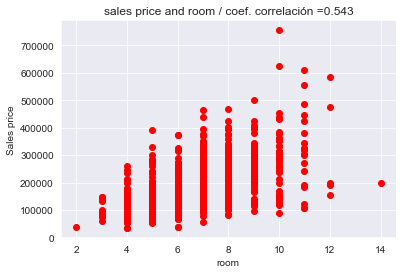

In [19]:
scatter('room',2)

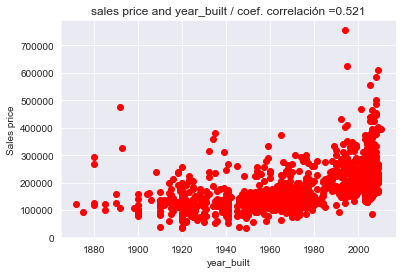

In [20]:
scatter('year_built',3)

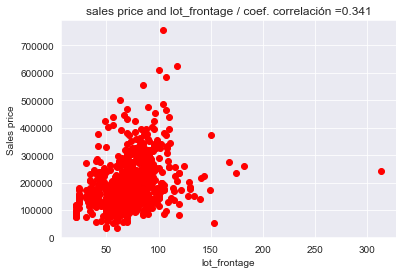

In [21]:
scatter('lot_frontage',4)


## <center> Regresión lineal   

### <center> ${y = \beta_0 + \beta_1 X}  $

##### Ecuación de la línea recta

###  ${y = \beta_0 + \beta_1 X}  $
En la regresión lineal, la ecuación de la línea recta se utiliza para modelar la relación entre las variables independientes y dependientes. 

Hay diferentes formas de calcular la regresión lineal matemáticamente y en esta ocasión se muestra por medio de matrices de la siguiente manera:

$\hat{\beta}= (X'X)^{-1} X'Y$

> 1. $ {\beta} $ = es un vector de coeficientes de la regresión lineal
> 2. $ {x} $ = es una matriz de valores de variables independientes, donde cada fila representa una observación y cada columna representa una variable independiente
> 3. $ {y} $ = es un vector de valores de la variable dependiente
> 4. $ {x}^T $ = es la matriz transpuesta de X
> 5. $ ({x}^T {x})^-1 $ = es la matriz inversa de la matriz producto de $ {x}^T y {x} $

In [22]:
# en este ejemplo se muestra como atraves del comando polyfit de numpy se puede calcular la regresion lineal, 
#  
X_ = X_entrenamiento[:,0]
Y_ = y_entrenamiento[:,0]
coefficients = np.polyfit(X_, Y_, deg=1)
print(" coeficientes de la regresion: " + "beta0 : "+ str(coefficients[1])+"   beta1 "+str(coefficients[0]) )


 coeficientes de la regresion: beta0 : -95435.30933266178   beta1 45386.58535666751


> donde:
> 1. ${y}$ es el precio de la vivienda (la variable dependiente)
> 2. ${x}$ es Calidad general de materiales y acabados de la vivienda (variable independiente)

##### Función de costo o pérdida
Mide el error promedio de los datos sin procesar (originales) y los datos estimados a partir de la regresion


##### Error cuadrático medio
El ECM representa el promedio de los errores al cuadrado entre las predicciones del modelo y los valores reales de la variable dependiente.

$ {ECM} = \frac{1}{N} \sum{i=1}^2 ({y_i}- \hat{y})^2 =   {ECM} = \frac{1}{N}  \sum_{i=1}^N  (y_i - \beta_0 - \beta_1 X_1)^2  $

donde:

> 1. $ {n} $ es el número de observaciones
> 2. $ {y} $ es el valor real de la variable dependiente
> 3. $ \hat{y}$ es el valor predicho de la variable dependiente


#### El gradiente descendiente
##### En los modelos de machine learning se utilizan para  minimizar el error cuadrático medio

$ \frac{\delta e}{\delta \beta_1} = \frac{1}{n}  \sum_{i=0}^N ((\hat{y} - y)* x) $

$ \frac{\delta e}{\delta \beta_0} = \frac{1}{n}  \sum_{i=0}^N ((\hat{y} - y)) $

##### Entonces la deriva de cada una es


$ \beta_0 = - \frac{2}{N} \sum_{i=1}^N (y_i - \beta_1 x - \beta_0) = {\beta_0}^i+1 = {\beta_0}^i -{\alpha} * \frac{\delta e}{\delta \beta_1} $ 

$ \beta_1 = - \frac{2}{N} \sum_{i=1}^N x(y_i - \beta_1 x - \beta_0)  =   {\beta_1}^i+1 = {\beta_1}^i -{\alpha} * \frac{\delta e}{\delta \beta_1}    $ 


In [23]:
# Funcion del descenso del gradiente
def gradiente_descendente(w_, b_, alfa, x, y):
    # El alfa es el learning rate que se elige, es decir el porcentaje de como cambia o se actualiza los pesos en cada iteración
    N = x.shape[0]     # donde N son los datos del modelo

    # Calculando las derivadas del gradiente descendiente que permite minimizar la pérdida del Error Cuadrático Medio (ECM)
    # Parametro que le pertenece a la derivada de beta1
    beta_1 = -(2/N)*np.sum(x*(y-(w_*x+b_)))
    # Parametro que le pertenece a la derivada de beta0
    beta_0 = -(2/N)*np.sum(y-(w_*x+b_))

    # Entonces, ahora se estarán actualizando los pesos de cada parametro, es decir la derivada de beta1 y beta2
    #Actualizar los pesos usando la fórmula del gradiente descendente
    b1 = w_ - alfa* beta_1
    b0 = b_ - alfa* beta_0

    return b1, b0
# Función de la estimación que incluye el erro 

def pasos(epocas_, learning_rate,iteracion_epocas , x ,y   ):
    def regresion(beta0,beta1,x):
        return  beta0 + beta1*x

    
    np.random.seed(2)
    beta1 = np.random.randn(1)[0]
    beta0 = np.random.randn(1)[0]

    alfa = learning_rate # tambien es conocido como learning rate 0.0009
    epocas = epocas_


    error = np.zeros((epocas,1))
    
    for i in range(epocas):
    # Descenso del gradiente que permite en cada iteracion actualizar el peso de cada valor
        [beta1, beta0] = gradiente_descendente(beta1,beta0,alfa,x,y)

    # Y estimada de la regresión
        y_estimada = regresion(beta0,beta1,x)

     # Error Cuadrático Medio = ECM
        N = y.shape[0]
        error[i] = np.sum((y-y_estimada)**2) / N
    
    # Imprimir resultados cada 1000 epochs
        if (i+1)% iteracion_epocas == 0:
            print("Época {}".format(i+1))
            print("    beta1: {:.1f}".format(beta1), " beta0: {:.1f}".format(beta0))
            print("    error: {}".format(error[i]))
            print("---------------------------------------")
            
    return beta0,beta1, epocas,error  

In [24]:
p = pasos(80,0.001, 10 , x = X_entrenamiento[:,0], y = y_entrenamiento[:,0] )

Época 10
    beta1: 16783.0  beta0: 2532.1
    error: [9.63226024e+09]
---------------------------------------
Época 20
    beta1: 24102.9  beta0: 3582.4
    error: [4.08632247e+09]
---------------------------------------
Época 30
    beta1: 27300.1  beta0: 3987.2
    error: [3.03303063e+09]
---------------------------------------
Época 40
    beta1: 28701.2  beta0: 4110.8
    error: [2.8324006e+09]
---------------------------------------
Época 50
    beta1: 29319.9  beta0: 4112.0
    error: [2.79359884e+09]
---------------------------------------
Época 60
    beta1: 29597.6  beta0: 4059.9
    error: [2.78551186e+09]
---------------------------------------
Época 70
    beta1: 29726.9  beta0: 3984.6
    error: [2.7832556e+09]
---------------------------------------
Época 80
    beta1: 29791.4  beta0: 3899.2
    error: [2.78210731e+09]
---------------------------------------


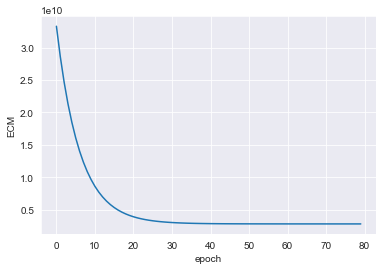

In [25]:
plt.plot(range(p[2]),p[3])
plt.xlabel('epoch')
plt.ylabel('ECM')
plt.show()

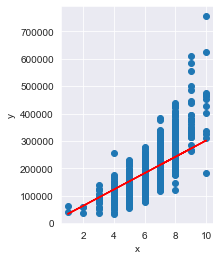

In [38]:
x_p = X_entrenamiento[:,0]
y_estima= p[0]+p[1]*x_p

plt.subplot(1,2,2)
plt.scatter(x_p,y_entrenamiento)
plt.plot(x_p,y_estima,'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

3899.230955762606

In [ ]:

def prediccion(x_prueba):
    lista=x_prueba
    y_predictivo = []
    x_valores = []
    for i in range(0 , (len(x_prueba)) ):
        y_predictivo.append((np.array(p[0])).astype(int) + (np.array(p[1]))*list(lista)[i])
        x_valores.append(list(lista)[i] )
    
    df = pd.DataFrame()
    df["y_estimado"] = pd.Series(y_predictivo)
    df["valores_de_x"] = pd.Series(x_valores)
    return df
prediccion(x_prueba[:,0])
  

In [ ]:
for i in range(1,10):
    print(list(x_prueba[:,0])[i] )